In [2]:
import crypto_tools as cpt
import importlib
importlib.reload(cpt)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
crypto_prices = cpt.get_top_coins(top_n=15).ffill()
crypto_index = cpt.get_cd_crypto_index(start_date_str='2000-01-01', end_date_str='2024-12-31')
prices_df = crypto_prices.merge(crypto_index.index_close, how='left', on='Date')

non_crypto_list = ['SP500','DJI','ND100','USDTUSD','USDCUSD','USDTKRW','USDCKRW','USDKRW','USDSGD','MSTR','GLD']
crypto_list = crypto_prices.columns[~crypto_prices.columns.isin(non_crypto_list)].tolist()

{'^GSPC': 'SP500', '^DJI': 'DJI', '^NDX': 'ND100', 'USDT-USD': 'USDTUSD', 'USDC-USD': 'USDCUSD', 'USDT-KRW': 'USDTKRW', 'USDC-KRW': 'USDCKRW', 'KRW=X': 'USDKRW', 'SGD=X': 'USDSGD', 'MSTR': 'MSTR', 'GLD': 'GLD', 'BTC-USD': 'BTC_USD', 'ETH-USD': 'ETH_USD', 'XRP-USD': 'XRP_USD', 'SOL-USD': 'SOL_USD', 'BNB-USD': 'BNB_USD', 'ADA-USD': 'ADA_USD', 'TRX-USD': 'TRX_USD', 'LINK-USD': 'LINK_USD', 'AVAX-USD': 'AVAX_USD', 'XLM-USD': 'XLM_USD', 'HBAR-USD': 'HBAR_USD', 'SUI-USD': 'SUI_USD', 'TON-USD': 'TON_USD', 'DOT-USD': 'DOT_USD', 'LTC-USD': 'LTC_USD'}


[*********************100%%**********************]  26 of 26 completed


2017-12-30 00:00:00 2025-01-01 00:00:00


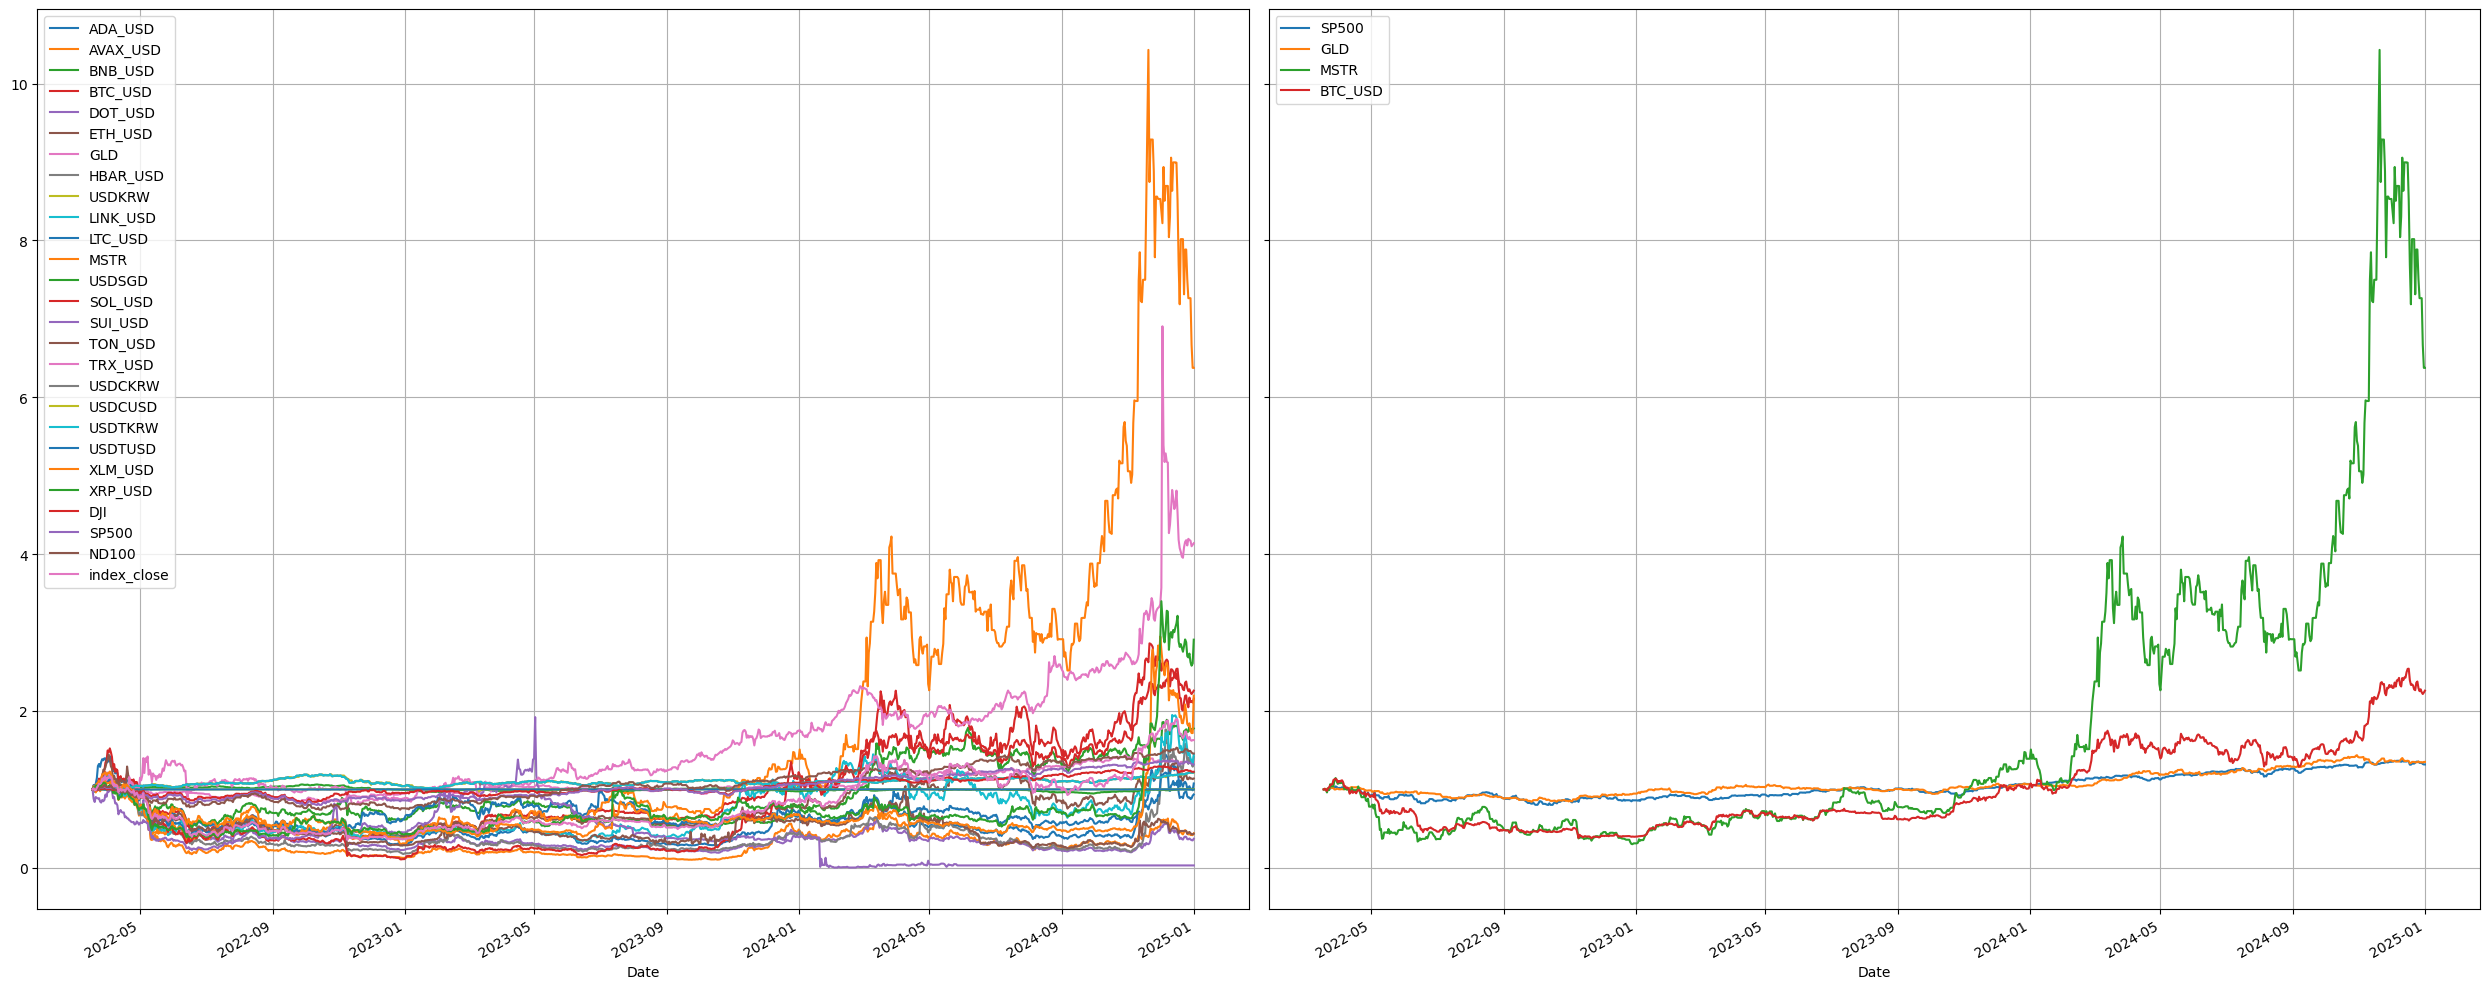

In [4]:
returns = prices_df.dropna().pct_change()[1:]
normalized_price = prices_df.dropna() / prices_df.dropna().iloc[0]

fig,ax = plt.subplots(1,2, figsize=(25,10), sharey=True)
normalized_price.plot(ax=ax[0]);

normalized_price.SP500.plot(label='SP500', ax=ax[1])
normalized_price.GLD.plot(label='GLD', ax=ax[1])
normalized_price.MSTR.plot(label='MSTR', ax=ax[1])
normalized_price.BTC_USD.plot(label='BTC_USD', ax=ax[1])

for i in range(len(ax)):
    ax[i].grid()
    ax[i].legend()
plt.tight_layout();

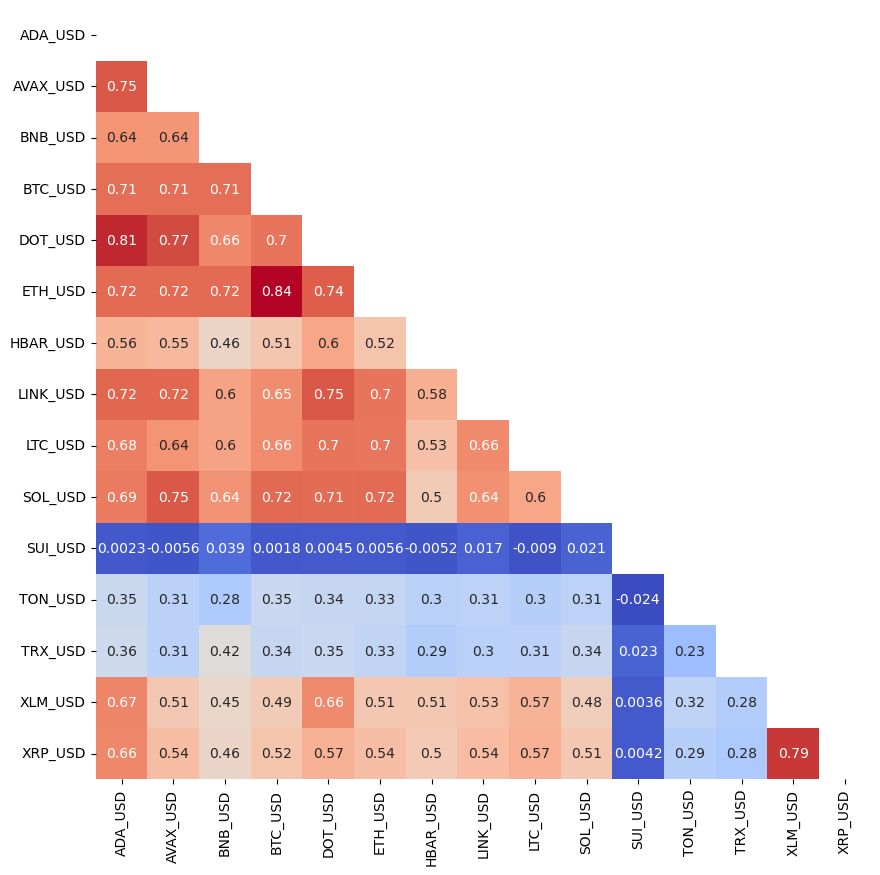

In [5]:
fig,ax = plt.subplots(figsize=(10,10))
crypto_corrmat = cpt.plot_corr_mat(returns[crypto_list], ax=ax, annot=True)

# Beta & correlation analysis

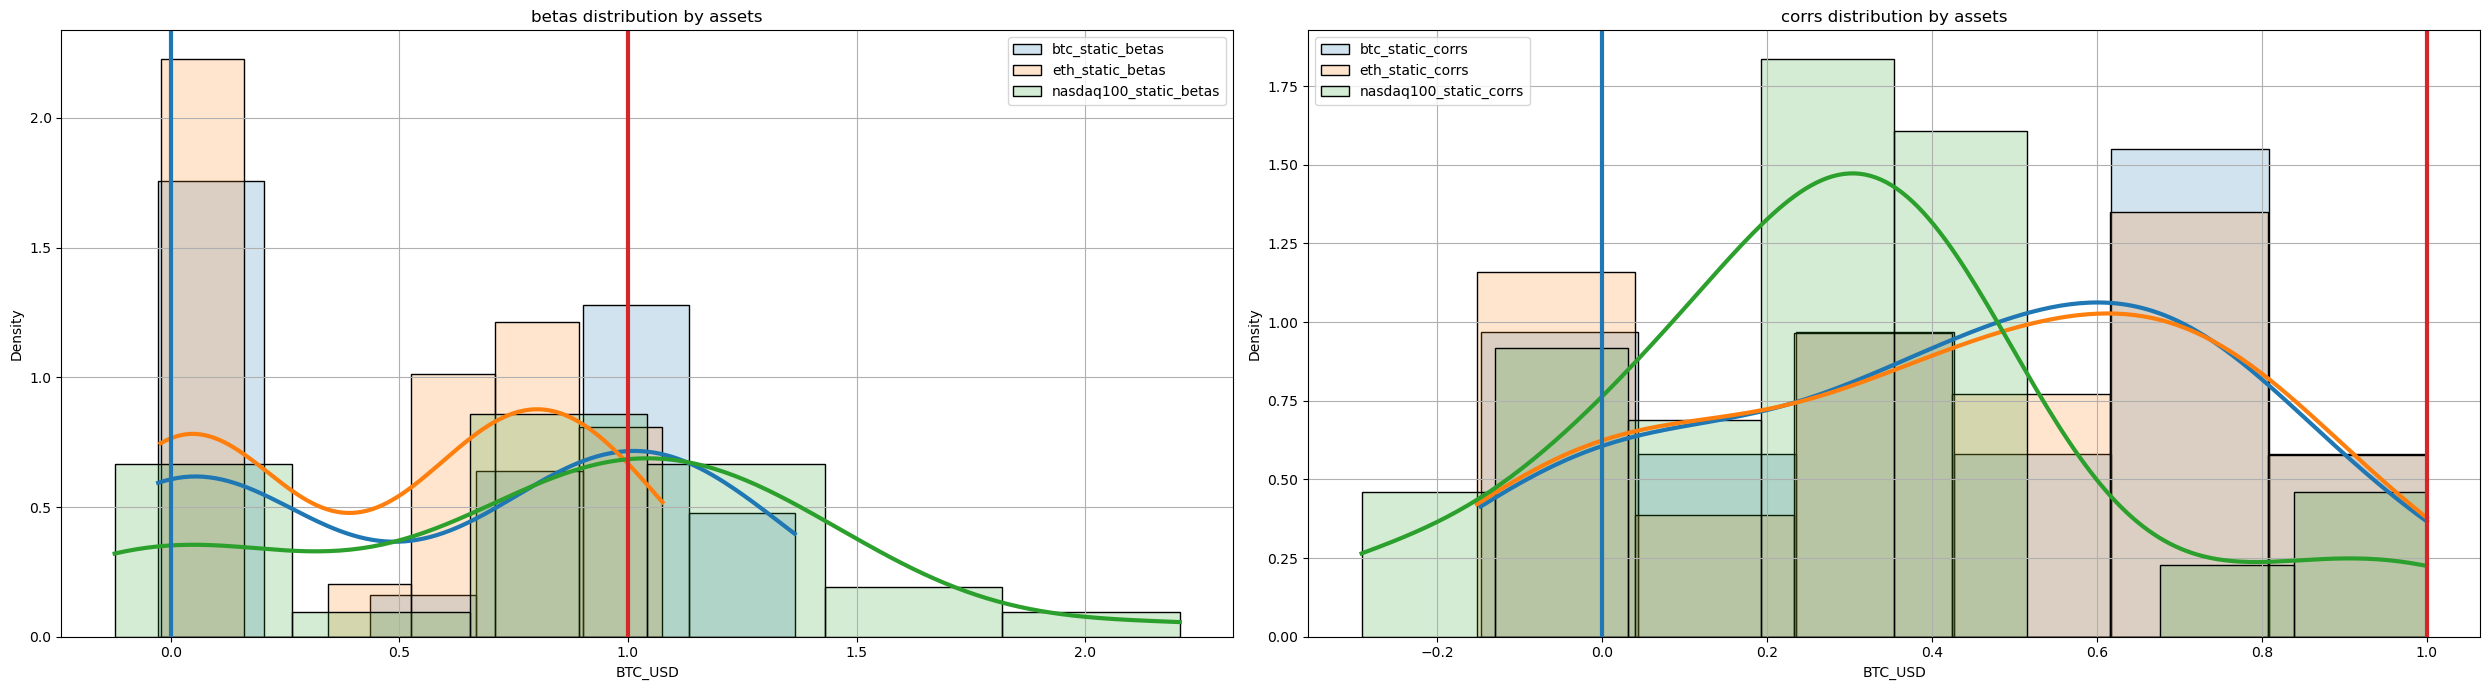

In [7]:
btc_static_betas = cpt.vectorized_beta(returns.dropna(), market_definition='BTC_USD')
eth_static_betas = cpt.vectorized_beta(returns.dropna(), market_definition='ETH_USD')
nasdaq100_static_betas = cpt.vectorized_beta(returns.dropna(), market_definition='ND100')

btc_static_corrs = cpt.vectorized_corr(returns.dropna(), market_definition='BTC_USD')
eth_static_corrs = cpt.vectorized_corr(returns.dropna(), market_definition='ETH_USD')
nasdaq100_static_corrs = cpt.vectorized_corr(returns.dropna(), market_definition='ND100')

fig,ax = plt.subplots(1,2, figsize=(25,7))
# plot beta distributions
sns.histplot(btc_static_betas, kde=True, alpha=0.2, ax=ax[0], stat='density', line_kws={'lw':3}, label='btc_static_betas')
sns.histplot(eth_static_betas, kde=True, alpha=0.2, ax=ax[0], stat='density', line_kws={'lw':3}, label='eth_static_betas')
sns.histplot(nasdaq100_static_betas, kde=True, alpha=0.2, ax=ax[0], stat='density', line_kws={'lw':3}, label='nasdaq100_static_betas')
ax[0].set_title('betas distribution by assets')

# plot correlation distributions
sns.histplot(btc_static_corrs, kde=True, alpha=0.2, ax=ax[1], stat='density', line_kws={'lw':3}, label='btc_static_corrs')
sns.histplot(eth_static_corrs, kde=True, alpha=0.2, ax=ax[1], stat='density', line_kws={'lw':3}, label='eth_static_corrs')
sns.histplot(nasdaq100_static_corrs, kde=True, alpha=0.2, ax=ax[1], stat='density', line_kws={'lw':3}, label='nasdaq100_static_corrs')
ax[1].set_title('corrs distribution by assets')

for i in range(len(ax)):
    ax[i].axvline(1, c='tab:red', lw=3);
    ax[i].axvline(0, c='tab:blue', lw=3);
    ax[i].grid()
    ax[i].legend()
plt.tight_layout();

crypto_rolling_betas mean  0.50
crypto_rolling_corrs mean  0.40
crypto_rolling_betas mean MSTR  1.30
crypto_rolling_corrs mean MSTR  0.63


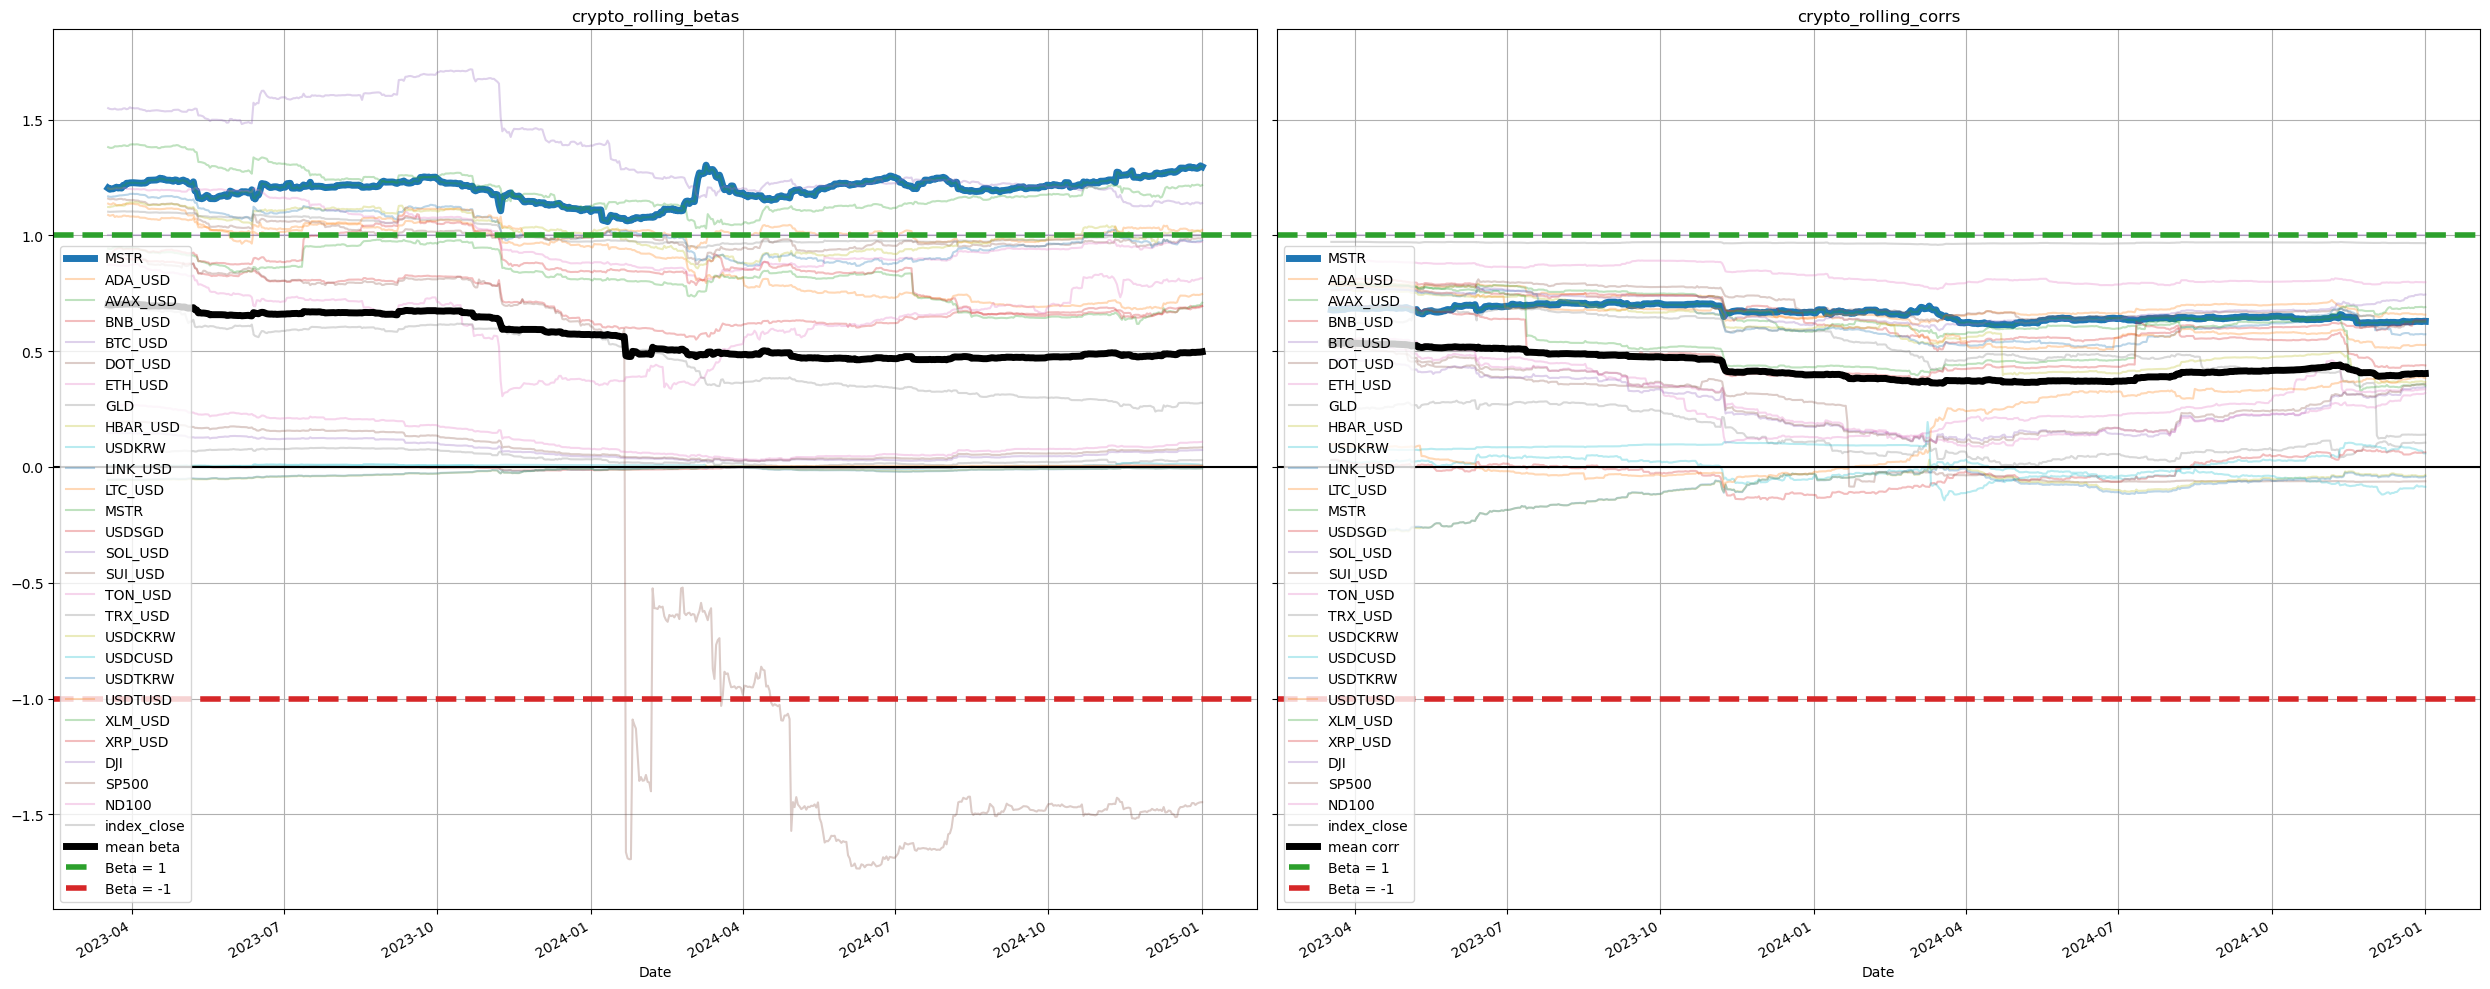

In [8]:
market='BTC_USD'
window=365
select_assets = 'MSTR'

# rolling betas
crypto_rolling_betas = cpt.vectorized_rolling_calc(returns.dropna(), market_definition=market, window_size=window, beta=True)
# rolling corrs
crypto_rolling_corrs = cpt.vectorized_rolling_calc(returns.dropna(), market_definition=market, window_size=window, beta=False)

fig,ax = plt.subplots(1,2, figsize=(25, 10), sharey=True)
crypto_rolling_betas[select_assets].dropna().plot(ax=ax[0], legend=False, title=f'crypto_rolling_betas {select_assets}', lw=5)
crypto_rolling_betas.dropna().plot(ax=ax[0], legend=False, title=f'crypto_rolling_betas', alpha=0.3)
crypto_rolling_betas.dropna().mean(axis=1).plot(ax=ax[0], label='mean beta', c='black', lw=5)

crypto_rolling_corrs[select_assets].dropna().plot(ax=ax[1], legend=False, title=f'crypto_rolling_corrs {select_assets}', lw=5)
crypto_rolling_corrs.dropna().plot(ax=ax[1], legend=False, title=f'crypto_rolling_corrs', alpha=0.3)
crypto_rolling_corrs.dropna().mean(axis=1).plot(ax=ax[1], label='mean corr', c='black', lw=5)

for i in range(len(ax)):
    ax[i].axhline(1, color='tab:green', linewidth=4, label='Beta = 1', ls='--')
    ax[i].axhline(-1, color='tab:red', linewidth=4, label='Beta = -1', ls='--')
    ax[i].axhline(0, color='black')
    ax[i].grid()
    ax[i].legend()
plt.tight_layout();

print(f'crypto_rolling_betas mean {crypto_rolling_betas.dropna().mean(axis=1).iloc[-1] : 0.2f}')
print(f'crypto_rolling_corrs mean {crypto_rolling_corrs.dropna().mean(axis=1).iloc[-1] : 0.2f}')
print(f'crypto_rolling_betas mean {select_assets} {crypto_rolling_betas[select_assets].dropna().iloc[-1] : 0.2f}')
print(f'crypto_rolling_corrs mean {select_assets} {crypto_rolling_corrs[select_assets].dropna().iloc[-1] : 0.2f}')

# Stablecoin & FX analysis

In [24]:
binance_usdc_usdt_spot = cpt.get_prices(exchange='binance', symbol='USDC/USDT', nobs=None, start=None, defaultType='spot', freq='1d')
upbit_usdt_krw_spot = cpt.get_prices(exchange='upbit', symbol='USDT/KRW', nobs=None, start=None, defaultType='spot', freq='1d')
upbit_usdc_krw_spot = cpt.get_prices(exchange='upbit', symbol='USDC/KRW', nobs=None, start=None, defaultType='spot', freq='1d')

stablecoin_fx_pairs = pd.concat([
    binance_usdc_usdt_spot['close'].rename('binance_usdc_usdt'),
    (1 / binance_usdc_usdt_spot['close']).rename('binance_usdt_usdc'),
    upbit_usdt_krw_spot['close'].rename('upbit_usdt_krw'),
    upbit_usdc_krw_spot['close'].rename('upbit_usdc_krw'),
    crypto_prices[['USDTUSD','USDCUSD','USDTKRW','USDCKRW','USDKRW','USDSGD']]
], axis=1)

# value at FX USD notional
stablecoin_fx_pairs['binance_usdt_usd'] = stablecoin_fx_pairs.binance_usdt_usdc * stablecoin_fx_pairs.USDCUSD
stablecoin_fx_pairs['binance_usdc_usd'] = stablecoin_fx_pairs.binance_usdc_usdt * stablecoin_fx_pairs.USDTUSD
stablecoin_fx_pairs['upbit_usdt_usd'] = stablecoin_fx_pairs['upbit_usdt_krw'] / stablecoin_fx_pairs.USDKRW
stablecoin_fx_pairs['upbit_usdc_usd'] = stablecoin_fx_pairs['upbit_usdc_krw'] / stablecoin_fx_pairs.USDKRW
stablecoin_fx_pairs['binance_usdt_krw'] = stablecoin_fx_pairs.binance_usdt_usdc * stablecoin_fx_pairs.USDKRW
stablecoin_fx_pairs['binance_usdc_krw'] = stablecoin_fx_pairs.binance_usdc_usdt * stablecoin_fx_pairs.USDKRW
stablecoin_fx_pairs = stablecoin_fx_pairs.dropna()

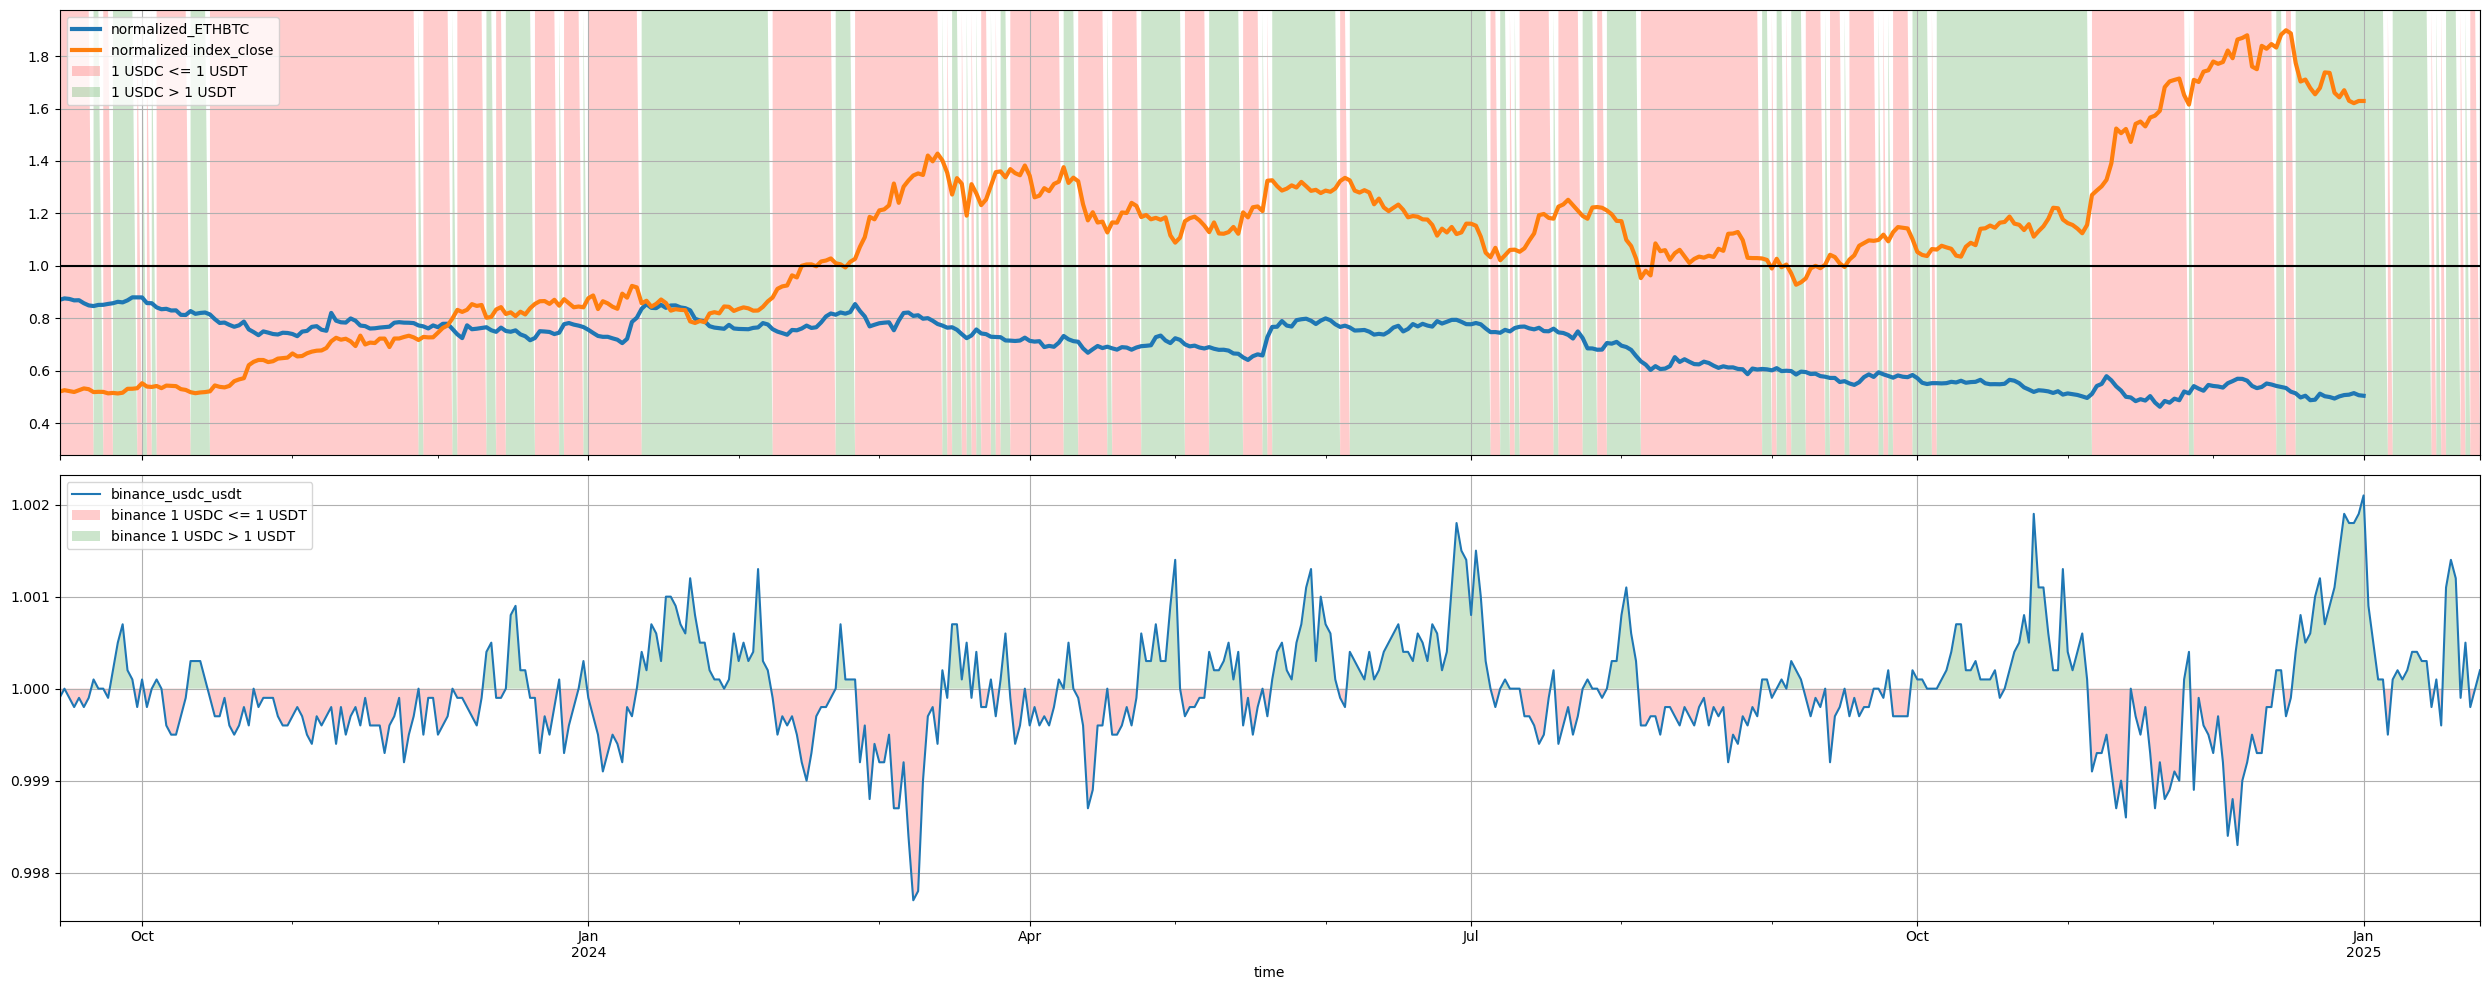

In [36]:
usdc_usdt = (crypto_prices.USDCUSD/crypto_prices.USDTUSD).dropna()
usdc_premium = (crypto_prices.USDCUSD - crypto_prices.USDTUSD).dropna() * 10_000 # in bps
normalized_ETHBTC = (normalized_price.ETH_USD / normalized_price.BTC_USD).dropna()

fig,ax = plt.subplots(2,1, figsize=(25,10), sharex=True)
normalized_ETHBTC.plot(ax=ax[0], lw=3, label='normalized_ETHBTC')
normalized_price.index_close.plot(ax=ax[0], lw=3, label='normalized index_close')
#usdc_premium.plot(ax=ax)
ax[0].axhline(1, c='black');
ylim = ax[0].get_ylim()
xlim = ax[0].get_xlim()
ax[0].set_ylim(ylim[0], ylim[1])
ax[0].set_xlim(xlim[0], xlim[1])
ax[0].fill_between(x=usdc_premium.index, y1=ylim[0], y2=ylim[1], 
                where=(usdc_premium <= 0), facecolor='r', alpha=0.2, label='1 USDC <= 1 USDT', interpolate=True)
ax[0].fill_between(x=usdc_premium.index, y1=ylim[0], y2=ylim[1], 
                where=(usdc_premium > 0), facecolor='g', alpha=0.2, label='1 USDC > 1 USDT', interpolate=True)

binance_usdc_usdt_spot.close.plot(ax=ax[1], label='binance_usdc_usdt')
ax[1].fill_between(x=binance_usdc_usdt_spot.index, y1=binance_usdc_usdt_spot.close, y2=1, 
                where=(binance_usdc_usdt_spot.close <= 1), facecolor='r', alpha=0.2, label='binance 1 USDC <= 1 USDT', interpolate=True)
ax[1].fill_between(x=binance_usdc_usdt_spot.index, y1=1, y2=binance_usdc_usdt_spot.close, 
                where=(binance_usdc_usdt_spot.close > 1), facecolor='g', alpha=0.2, label='binance 1 USDC > 1 USDT', interpolate=True)

for i in range(len(ax)):
    ax[i].grid()
    ax[i].legend()
plt.tight_layout();

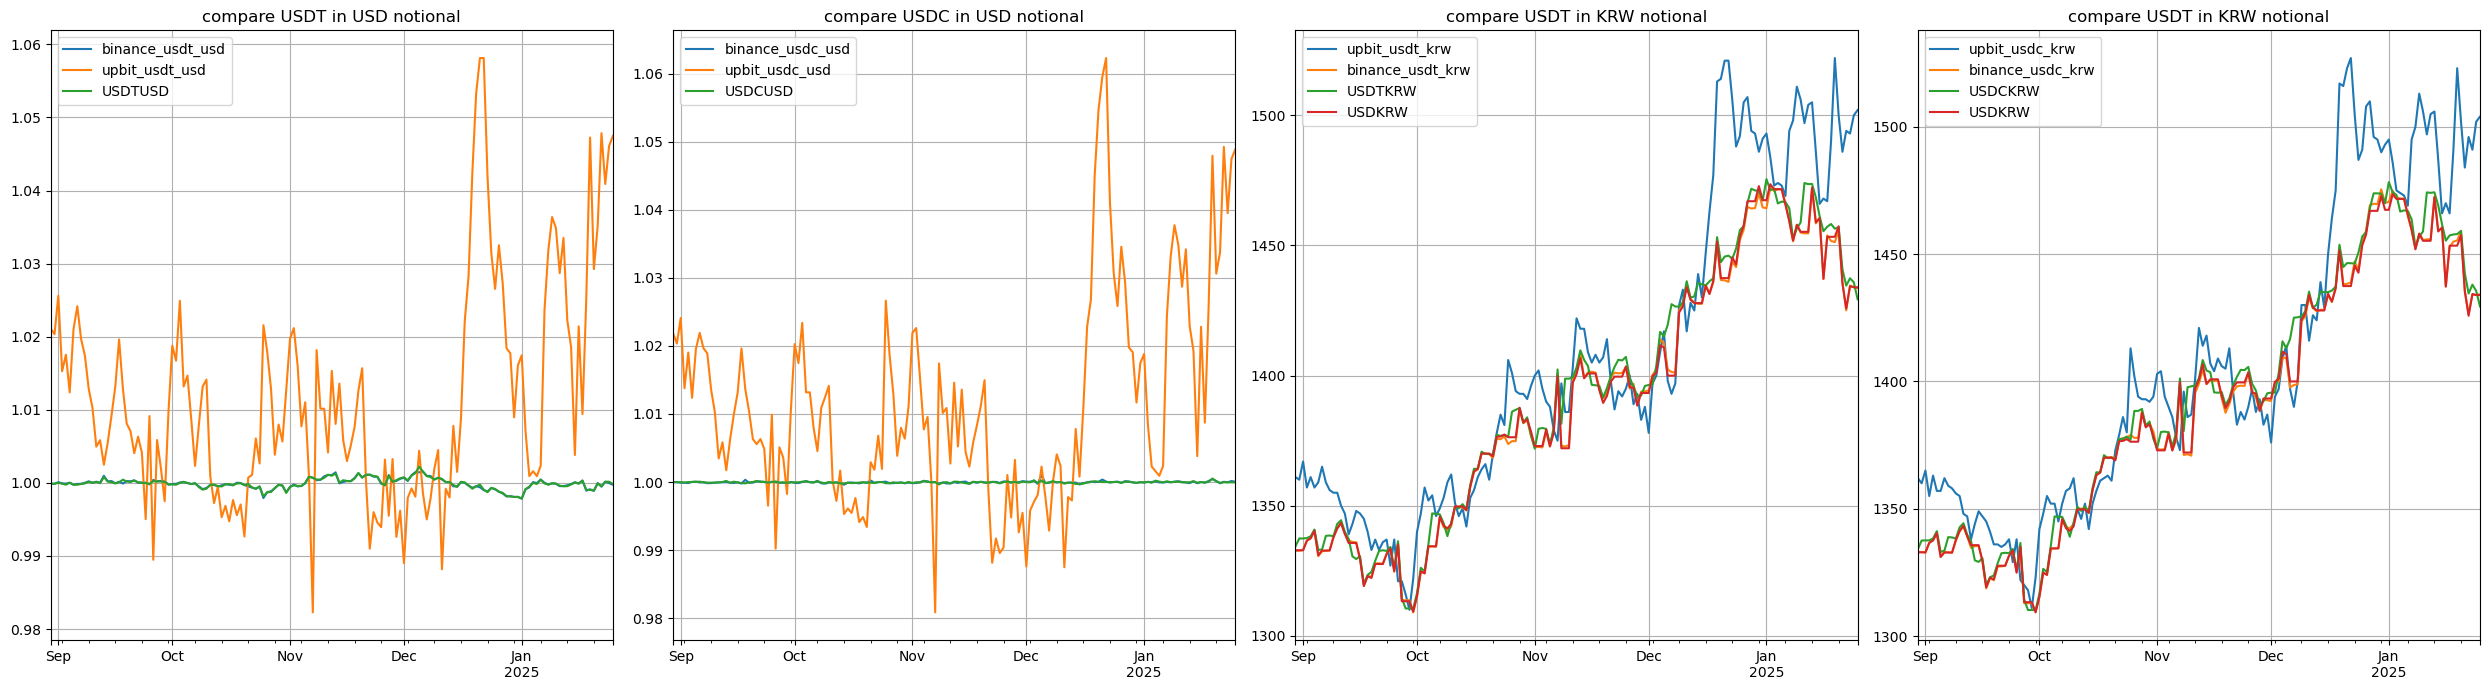

In [28]:
fig,ax = plt.subplots(1,4, figsize=(25,7))
stablecoin_fx_pairs['binance_usdt_usd'].plot(ax=ax[0], label='binance_usdt_usd', title='compare USDT in USD notional')
stablecoin_fx_pairs['upbit_usdt_usd'].plot(ax=ax[0], label='upbit_usdt_usd')
stablecoin_fx_pairs['USDTUSD'].plot(ax=ax[0], label='USDTUSD')

stablecoin_fx_pairs['binance_usdc_usd'].plot(ax=ax[1], label='binance_usdc_usd', title='compare USDC in USD notional')
stablecoin_fx_pairs['upbit_usdc_usd'].plot(ax=ax[1], label='upbit_usdc_usd')
stablecoin_fx_pairs['USDCUSD'].plot(ax=ax[1], label='USDCUSD')

stablecoin_fx_pairs['upbit_usdt_krw'].plot(ax=ax[2], label='upbit_usdt_krw', title='compare USDT in KRW notional')
stablecoin_fx_pairs['binance_usdt_krw'].plot(ax=ax[2], label='binance_usdt_krw')
stablecoin_fx_pairs['USDTKRW'].plot(ax=ax[2], label='USDTKRW')
stablecoin_fx_pairs['USDKRW'].plot(ax=ax[2], label='USDKRW')

stablecoin_fx_pairs['upbit_usdc_krw'].plot(ax=ax[3], label='upbit_usdc_krw', title='compare USDT in KRW notional')
stablecoin_fx_pairs['binance_usdc_krw'].plot(ax=ax[3], label='binance_usdc_krw')
stablecoin_fx_pairs['USDCKRW'].plot(ax=ax[3], label='USDCKRW')
stablecoin_fx_pairs['USDKRW'].plot(ax=ax[3], label='USDKRW')

for i in range(len(ax)):
    ax[i].grid()
    ax[i].legend()
plt.tight_layout();

yf_kimprem_usdc_usd:  9.60pips
yf_kimprem_usdt_usd:  8.07pips
ccxt_kimprem_usdt_usd:  119.43pips
ccxt_kimprem_usdc_usd:  119.49pips
ccxt_kimprem_usdt_krw:  16.79KRW per 1 USD(T|C)
ccxt_kimprem_usdc_krw:  16.72KRW per 1 USD(T|C)
fxprem_usdt_krw:  16.71KRW per 1 USD(T|C)
fxprem_usdc_krw:  16.80KRW per 1 USD(T|C)


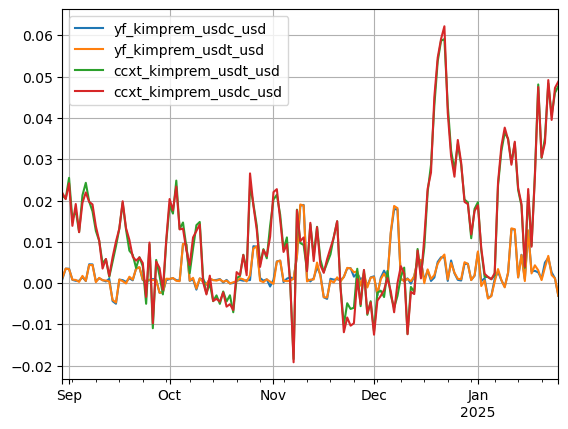

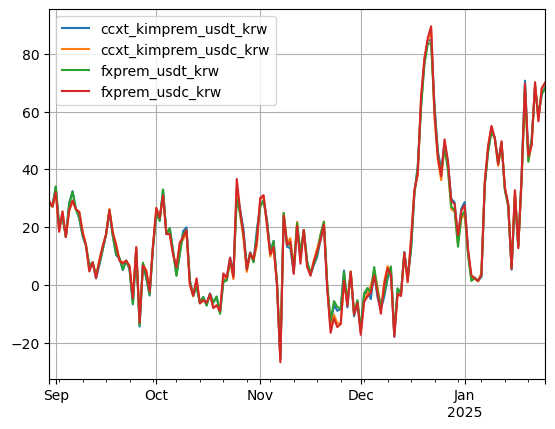

In [196]:
# from yf source crypto price valued in yf fx rate
yf_kimprem_usdc_usd = (crypto_prices.USDCKRW / crypto_prices.USDKRW) - crypto_prices.USDCUSD
yf_kimprem_usdt_usd = (crypto_prices.USDTKRW / crypto_prices.USDKRW) - crypto_prices.USDTUSD

# from ccxt source crypto price valued in yf fx rate
ccxt_kimprem_usdt_usd = stablecoin_fx_pairs['upbit_usdt_usd'] - stablecoin_fx_pairs['binance_usdt_usd']
ccxt_kimprem_usdc_usd = stablecoin_fx_pairs['upbit_usdc_usd'] - stablecoin_fx_pairs['binance_usdc_usd']
ccxt_kimprem_usdt_krw = stablecoin_fx_pairs['upbit_usdt_krw'] - stablecoin_fx_pairs['binance_usdt_krw']
ccxt_kimprem_usdc_krw = stablecoin_fx_pairs['upbit_usdc_krw'] - stablecoin_fx_pairs['binance_usdc_krw']

# edge above fx
fxprem_usdt_krw = stablecoin_fx_pairs['upbit_usdt_krw'] - stablecoin_fx_pairs['USDKRW']
fxprem_usdc_krw = stablecoin_fx_pairs['upbit_usdc_krw'] - stablecoin_fx_pairs['USDKRW']

kimprem_df = pd.concat([
    yf_kimprem_usdc_usd.rename('yf_kimprem_usdc_usd'),
    yf_kimprem_usdt_usd.rename('yf_kimprem_usdt_usd'),
    ccxt_kimprem_usdt_usd.rename('ccxt_kimprem_usdt_usd'),
    ccxt_kimprem_usdc_usd.rename('ccxt_kimprem_usdc_usd'),
    ccxt_kimprem_usdt_krw.rename('ccxt_kimprem_usdt_krw'),
    ccxt_kimprem_usdc_krw.rename('ccxt_kimprem_usdc_krw'),
    fxprem_usdt_krw.rename('fxprem_usdt_krw'),
    fxprem_usdc_krw.rename('fxprem_usdc_krw')
], axis=1)

# avg premiums
print(f'yf_kimprem_usdc_usd: {yf_kimprem_usdc_usd.mean() * 10_000: 0.2f}pips')
print(f'yf_kimprem_usdt_usd: {yf_kimprem_usdt_usd.mean() * 10_000: 0.2f}pips')
print(f'ccxt_kimprem_usdt_usd: {ccxt_kimprem_usdt_usd.mean() * 10_000: 0.2f}pips')
print(f'ccxt_kimprem_usdc_usd: {ccxt_kimprem_usdc_usd.mean() * 10_000: 0.2f}pips')
print(f'ccxt_kimprem_usdt_krw: {ccxt_kimprem_usdt_krw.mean(): 0.2f}KRW per 1 USD(T|C)')
print(f'ccxt_kimprem_usdc_krw: {ccxt_kimprem_usdc_krw.mean(): 0.2f}KRW per 1 USD(T|C)')
print(f'fxprem_usdt_krw: {fxprem_usdt_krw.mean(): 0.2f}KRW per 1 USD(T|C)')
print(f'fxprem_usdc_krw: {fxprem_usdc_krw.mean(): 0.2f}KRW per 1 USD(T|C)')

kimprem_df.filter(regex='_usd.*_usd').dropna().plot(grid=True);
kimprem_df.filter(regex='_usd.*_krw').dropna().plot(grid=True);

usdt_edge_above_fx:  68.07 KRW
usdt_edge_above_fx:  70.07 KRW


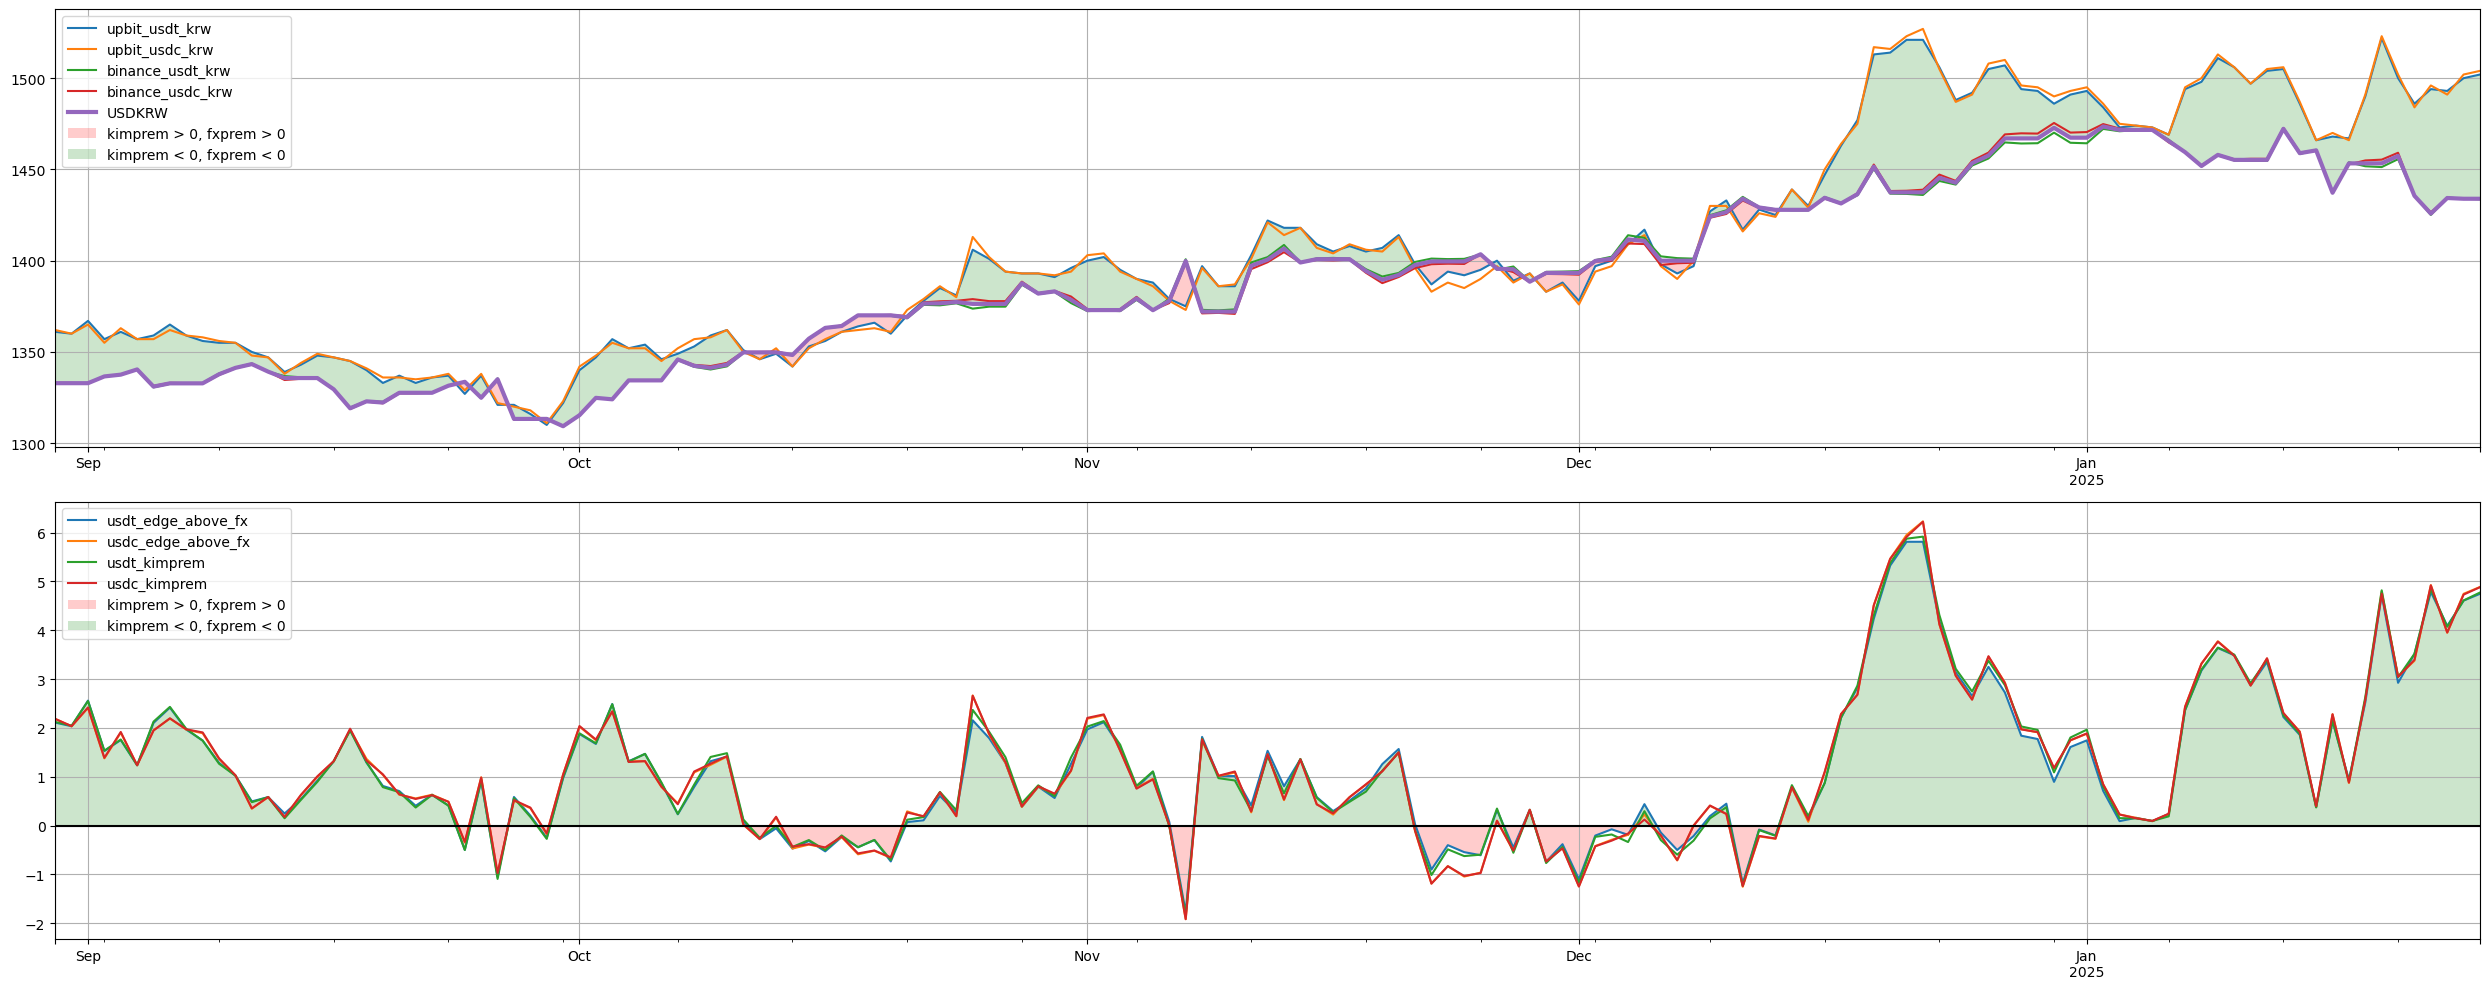

In [198]:
usdt_edge_above_fx = 100 * (stablecoin_fx_pairs.upbit_usdt_krw / stablecoin_fx_pairs.USDKRW - 1)
usdc_edge_above_fx = 100 * (stablecoin_fx_pairs.upbit_usdc_krw / stablecoin_fx_pairs.USDKRW - 1)
usdt_kimprem = 100 * (stablecoin_fx_pairs.upbit_usdt_usd / stablecoin_fx_pairs.binance_usdt_usd - 1)
usdc_kimprem = 100 * (stablecoin_fx_pairs.upbit_usdc_usd / stablecoin_fx_pairs.binance_usdc_usd - 1)

fig,ax = plt.subplots(2,1, figsize=(25,10))
stablecoin_fx_pairs.upbit_usdt_krw.plot(ax=ax[0], label='upbit_usdt_krw')
stablecoin_fx_pairs.upbit_usdc_krw.plot(ax=ax[0], label='upbit_usdc_krw')
stablecoin_fx_pairs.binance_usdt_krw.plot(ax=ax[0], label='binance_usdt_krw')
stablecoin_fx_pairs.binance_usdc_krw.plot(ax=ax[0], label='binance_usdc_krw')
stablecoin_fx_pairs.USDKRW.plot(ax=ax[0], label='USDKRW', lw=3)
ax[0].fill_between(x=stablecoin_fx_pairs.index, y1=stablecoin_fx_pairs.upbit_usdt_krw, y2=stablecoin_fx_pairs.USDKRW, 
                where=(stablecoin_fx_pairs.upbit_usdt_krw <= stablecoin_fx_pairs.USDKRW), facecolor='r', alpha=0.2, label='kimprem > 0, fxprem > 0', interpolate=True)
ax[0].fill_between(x=stablecoin_fx_pairs.index, y1=stablecoin_fx_pairs.USDKRW, y2=stablecoin_fx_pairs.upbit_usdt_krw, 
                where=(stablecoin_fx_pairs.upbit_usdt_krw > stablecoin_fx_pairs.USDKRW), facecolor='g', alpha=0.2, label='kimprem < 0, fxprem < 0', interpolate=True)

usdt_edge_above_fx.plot(ax=ax[1], label='usdt_edge_above_fx')
usdc_edge_above_fx.plot(ax=ax[1], label='usdc_edge_above_fx')
usdt_kimprem.plot(ax=ax[1], label='usdt_kimprem')
usdc_kimprem.plot(ax=ax[1], label='usdc_kimprem')
ax[1].axhline(0, c='black')
ax[1].fill_between(x=usdt_edge_above_fx.index, y1=usdt_edge_above_fx, y2=0, 
                where=(usdt_edge_above_fx <= 0), facecolor='r', alpha=0.2, label='kimprem > 0, fxprem > 0', interpolate=True)
ax[1].fill_between(x=stablecoin_fx_pairs.index, y1=0, y2=usdt_edge_above_fx, 
                where=(usdt_edge_above_fx > 0), facecolor='g', alpha=0.2, label='kimprem < 0, fxprem < 0', interpolate=True)

for i in range(len(ax)):
    ax[i].grid()
    ax[i].legend()
plt.tight_layout();

print(f'usdt_edge_above_fx: {stablecoin_fx_pairs.upbit_usdt_krw.iloc[-1] - stablecoin_fx_pairs.USDKRW.iloc[-1]: 0.2f} KRW')
print(f'usdt_edge_above_fx: {stablecoin_fx_pairs.upbit_usdc_krw.iloc[-1] - stablecoin_fx_pairs.USDKRW.iloc[-1]: 0.2f} KRW')

In [615]:
import fx_premium as fxp
import importlib
importlib.reload(fxp)

output_dict = fxp.get_fx_premium(regex='^pct_.*_krw$', window=10)
stablecoin_fx_pairs = output_dict['stablecoin_fx_pairs']
rank = output_dict['rank']
summ_ser = output_dict['summ_ser']
summ_rank = output_dict['summ_rank']

% premium: 5.13%
% rank: 95.66 / 100%


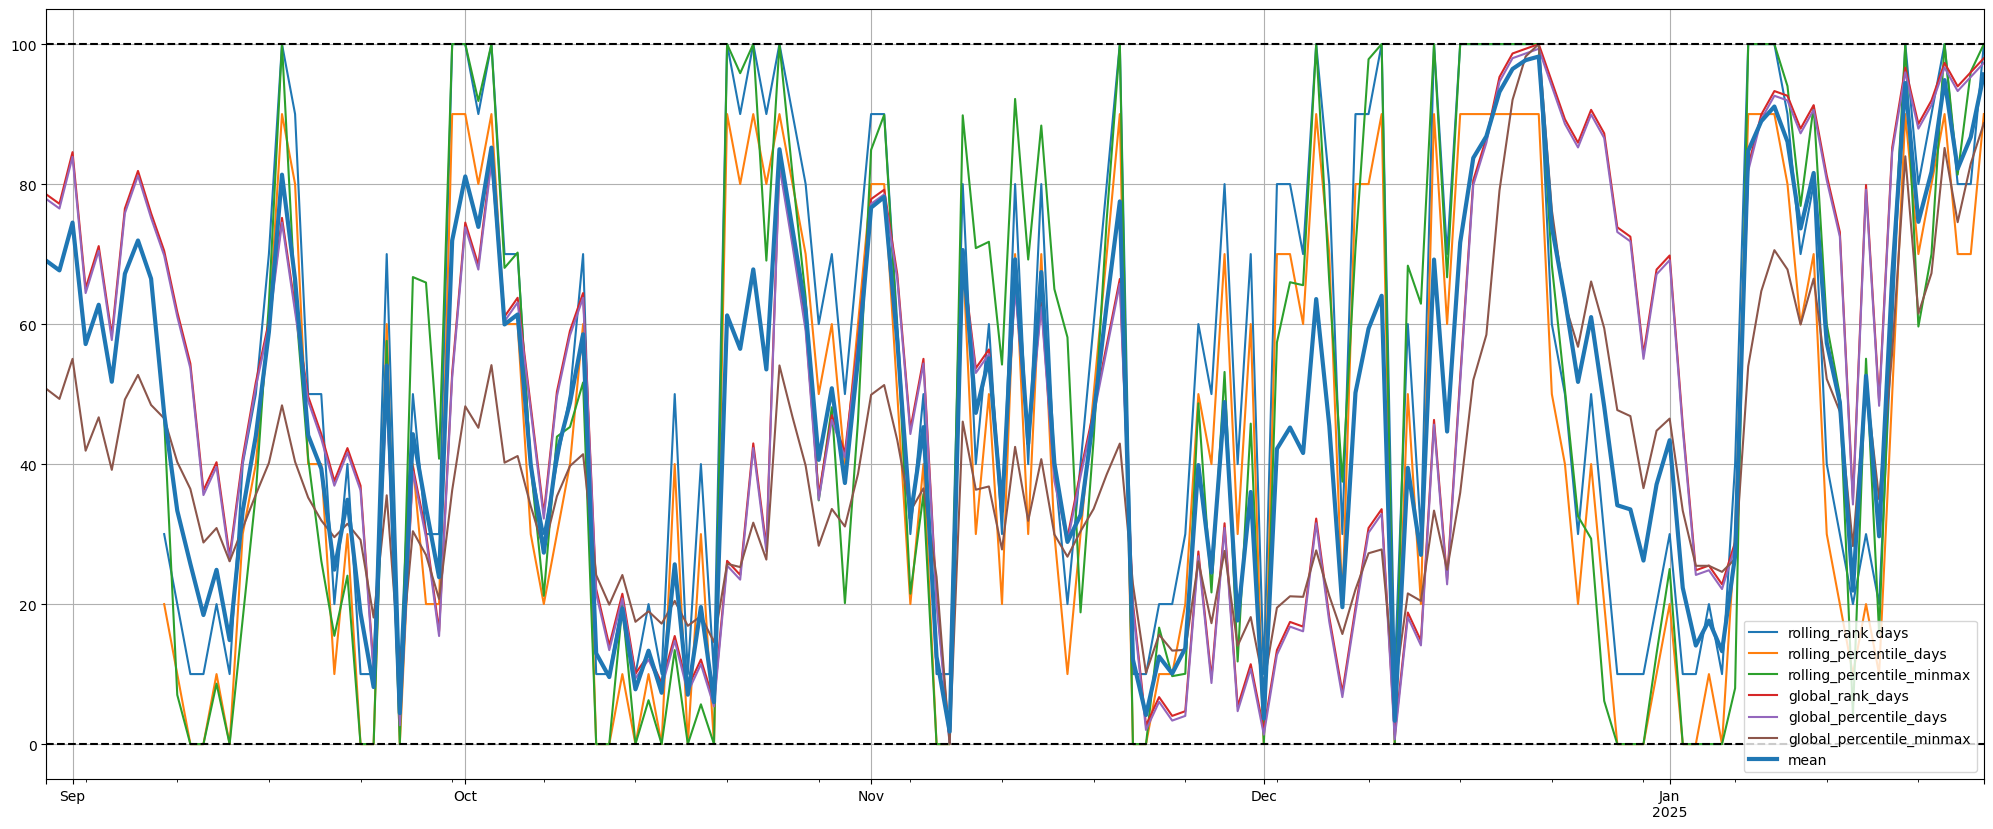

In [617]:
fig,ax = plt.subplots(figsize=(25,10))
rank.plot(ax=ax)
rank.mean(axis=1).plot(ax=ax, lw=3, label='mean', c='tab:blue')
ax.axhline(0, c='black', ls='--')
ax.axhline(100, c='black', ls='--')
ax.grid()
ax.legend();

In [619]:
rank.tail(1).T

,2025-01-25
rolling_rank_days,100.000000
rolling_percentile_days,90.000000
rolling_percentile_minmax,100.000000
global_rank_days,97.986577
global_percentile_days,97.315436
global_percentile_minmax,88.678278


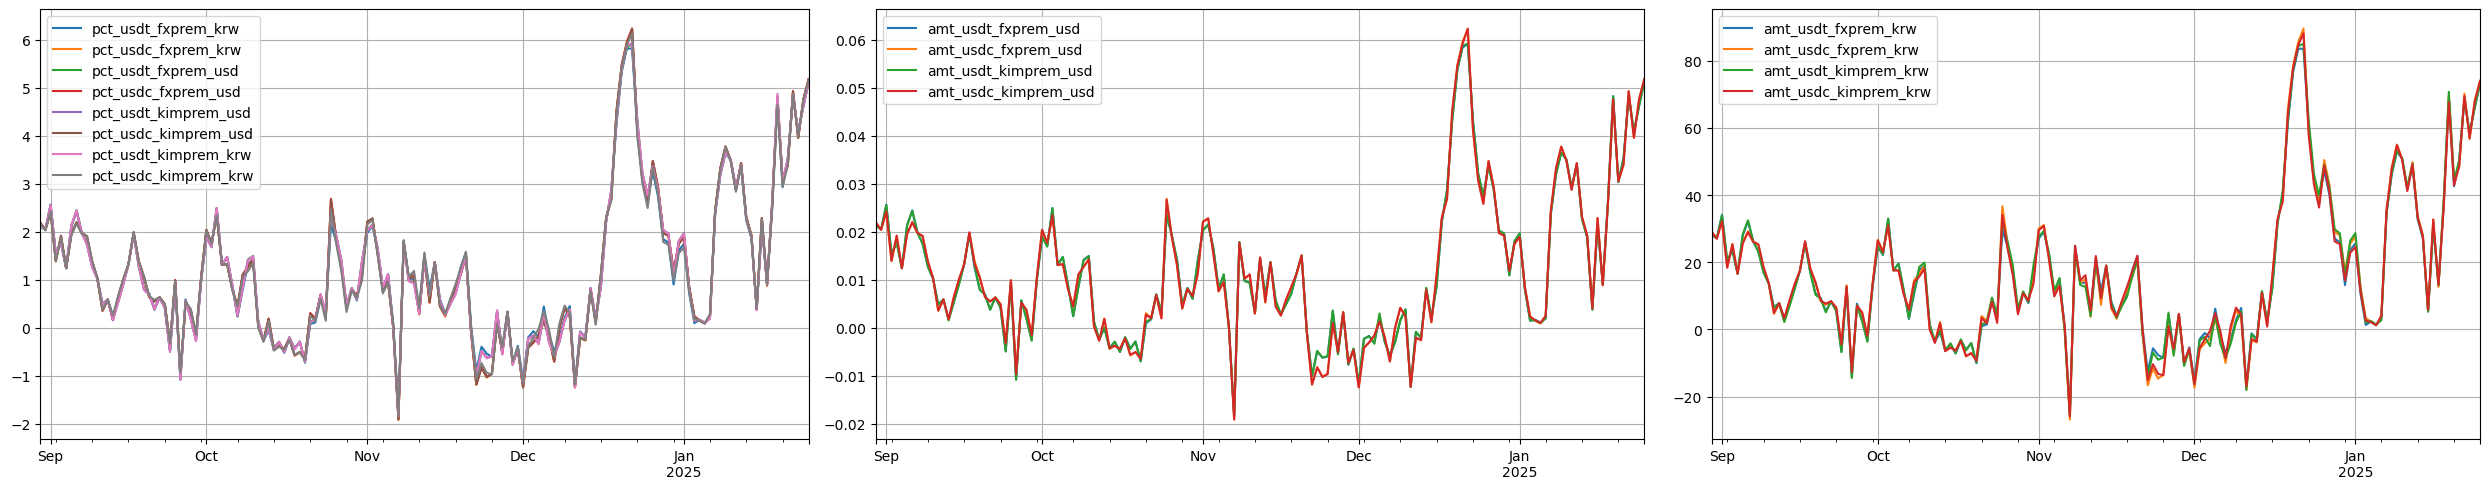

In [621]:
# stablecoin_fx_pairs.filter(regex='^yf_pct_.*').plot()
# stablecoin_fx_pairs.filter(regex='^yf_amt_.*_krw$').plot()
# stablecoin_fx_pairs.filter(regex='^yf_amt_.*_usd$').plot()
fig,ax = plt.subplots(1,3, figsize=(25,5), sharex=True)
stablecoin_fx_pairs.filter(regex='^pct_.*').plot(ax=ax[0])
stablecoin_fx_pairs.filter(regex='^amt_.*_usd$').plot(ax=ax[1])
stablecoin_fx_pairs.filter(regex='^amt_.*_krw$').plot(ax=ax[2])

for i in range(len(ax)):
    ax[i].grid()
    ax[i].legend(loc='upper left')
plt.tight_layout();